# Name : Vaidehi Santosh Pawar

# Task 5: Sales Prediction using python   

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('./dataset/Advertising.csv')

In [5]:
df.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
78,79,5.4,29.9,9.4,5.3
168,169,215.4,23.6,57.6,17.1
56,57,7.3,28.1,41.4,5.5
66,67,31.5,24.6,2.2,9.5


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df = df.drop(columns= ['Unnamed: 0'])

In [10]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


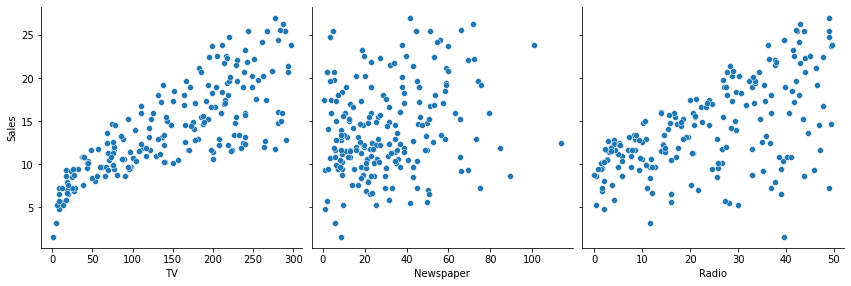

In [43]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

<Figure size 1200x800 with 0 Axes>

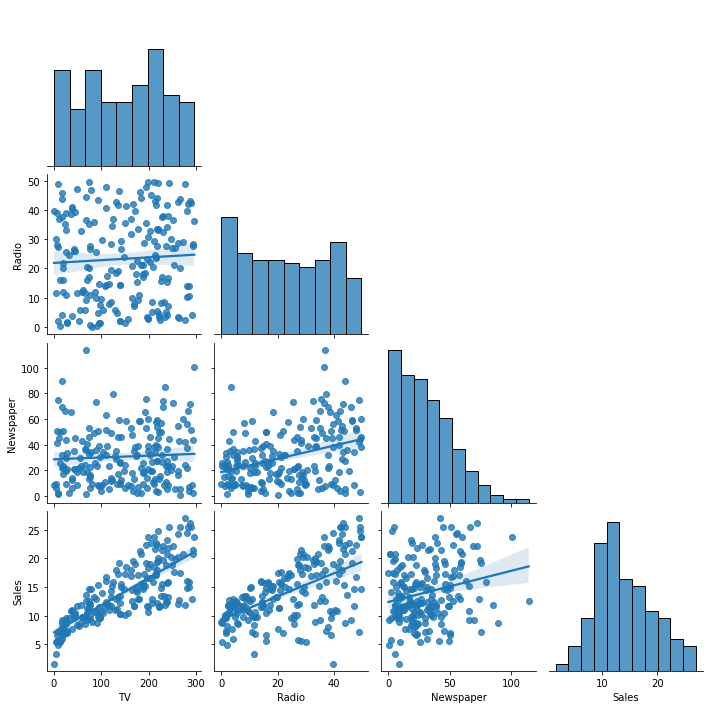

In [42]:
plt.figure(dpi=200)
sns.pairplot(df, kind='reg',corner=True)

In [12]:
X = df.drop('Sales', axis=1)

In [13]:
y = df['Sales']

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [22]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [24]:
poly_features = polynomial_converter.transform(X)

In [25]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(poly_features,y,test_size=0.3,random_state =101)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model  = LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression()

In [31]:
test_predictions = model.predict(X_test)

In [32]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [34]:
MAE = mean_absolute_error(y_test,test_predictions)

In [37]:
MAE

0.4896798044803672

In [35]:
MSE = mean_squared_error(y_test,test_predictions)

In [38]:
MSE

0.44175055104035066

In [36]:
RMSE  =  np.sqrt(MSE)

In [39]:
RMSE

0.6646431757269089

In [48]:
results = pd.DataFrame({"Actual Sales": y_test, "Predicted Sales": test_predictions})
print(results[:5])

     Actual Sales  Predicted Sales
37           14.7        13.948562
109          19.8        19.334803
31           11.9        12.319282
89           16.7        16.762863
66            9.5         7.902109


<AxesSubplot: xlabel='Actual Sales', ylabel='Predicted Sales'>

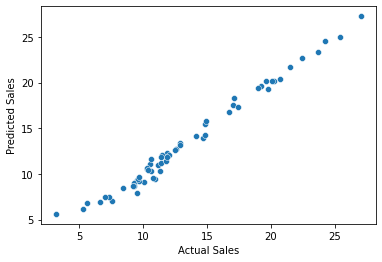

In [49]:
sns.scatterplot(results,x='Actual Sales',y='Predicted Sales')

In [50]:
new_data = pd.DataFrame({"TV": [100, 200], "radio": [20, 30], "newspaper": [10, 5]})
new_data_poly = polynomial_converter.transform(new_data)
new_pred = model.predict(new_data_poly)
print("Sales predictions for new data:", new_pred)

Sales predictions for new data: [11.84075776 18.33600975]
